In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50


# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')
# Set model weights
W = tf.Variable(rng.rand(),name = 'weighs')
b = tf.Variable(rng.rand(),name = 'bias')

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W),b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples) #tf.pow 幂值计算
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.083850235 W= 0.29607946 b= 0.46705094
Epoch: 0100 cost= 0.083054692 W= 0.2933146 b= 0.48694038
Epoch: 0150 cost= 0.082351178 W= 0.2907143 b= 0.50564694
Epoch: 0200 cost= 0.081729122 W= 0.28826874 b= 0.5232401
Epoch: 0250 cost= 0.081179045 W= 0.28596854 b= 0.5397875
Epoch: 0300 cost= 0.080692597 W= 0.2838051 b= 0.5553511
Epoch: 0350 cost= 0.080262490 W= 0.28177035 b= 0.569989
Epoch: 0400 cost= 0.079882190 W= 0.27985653 b= 0.583757
Epoch: 0450 cost= 0.079545908 W= 0.27805635 b= 0.5967072
Epoch: 0500 cost= 0.079248615 W= 0.27636334 b= 0.60888654
Epoch: 0550 cost= 0.078985780 W= 0.27477136 b= 0.62033975
Epoch: 0600 cost= 0.078753442 W= 0.27327403 b= 0.6311115
Epoch: 0650 cost= 0.078548059 W= 0.27186573 b= 0.6412425
Epoch: 0700 cost= 0.078366496 W= 0.2705412 b= 0.6507708
Epoch: 0750 cost= 0.078205958 W= 0.2692954 b= 0.65973294
Epoch: 0800 cost= 0.078064092 W= 0.26812375 b= 0.6681621
Epoch: 0850 cost= 0.077938683 W= 0.2670217 b= 0.67608994
Epoch: 0900 cost= 0.077827826 W=

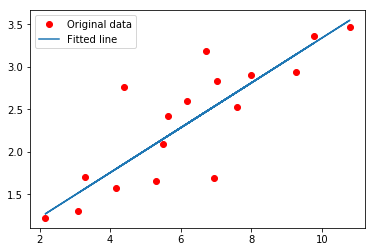

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y): #zip:打包为元组的列表
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()    